# 전처리

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statistics
import matplotlib as mpl
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#상대경로로 폴더 이동
#현재 경로 확인
os.getcwd()

# 하위 data 폴더로 이동
os.chdir('..')
os.chdir('./data')

In [3]:
train = pd.read_excel('train.xlsx', header=0)

In [4]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,유역평균강수,강우(A지역),강우(B지역),강우(C지역),...,강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역)
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,...,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585


In [5]:
#열 이름을 바꾸고자함
train.columns

Index(['홍수사상번호', '연', '월', '일', '시간', '유입량', '데이터집단 1', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       '데이터집단 2', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', '데이터집단 3', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', '데이터 집단 4',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', '데이터 집단 5', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', '데이터 집단 6',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47'],
      dtype='object')

In [6]:
train.rename(columns = {  '홍수사상번호' : 'FloodEventNo','연' : 'Y','월':'M','일':'D','시간':'T','유입량':'InflowRate',
                       '데이터집단 1' : 'BMR1', 'Unnamed: 7' : 'rainfallA_1', 'Unnamed: 8' : 'rainfallB_1',
                       'Unnamed: 9' : 'rainfallC_1', 'Unnamed: 10' : 'rainfallD_1', 'Unnamed: 11' : 'WaterLevelE1','Unnamed: 12' : 'WaterLevelD1',
                        
                       '데이터집단 2' : 'BMR2', 'Unnamed: 14' : 'rainfallA_2', 'Unnamed: 15' : 'rainfallB_2',
                       'Unnamed: 16' : 'rainfallC_2', 'Unnamed: 17' : 'rainfallD_2', 'Unnamed: 18' : 'WaterLevelE2','Unnamed: 19' : 'WaterLevelD2',
                        
                       '데이터집단 3' : 'BMR3', 'Unnamed: 21' : 'rainfallA_3', 'Unnamed: 22' :  'rainfallB_3',
                       'Unnamed: 23' : 'rainfallC_3', 'Unnamed: 24' : 'rainfallD_3', 'Unnamed: 25' : 'WaterLevelE3','Unnamed: 26' : 'WaterLevelD3',
                        
                       '데이터 집단 4' : 'BMR4', 'Unnamed: 28' : 'rainfallA_4', 'Unnamed: 29' : 'rainfallB_4',
                       'Unnamed: 30' : 'rainfallC_4', 'Unnamed: 31' : 'rainfallD_4', 'Unnamed: 32' : 'WaterLevelE4','Unnamed: 33' : 'WaterLevelD4',
                        
                       '데이터 집단 5' : 'BMR5', 'Unnamed: 35' : 'rainfallA_5', 'Unnamed: 36' : 'rainfallB_5',
                       'Unnamed: 37' : 'rainfallC_5', 'Unnamed: 38' : 'rainfallD_5', 'Unnamed: 39' : 'WaterLevelE5','Unnamed: 40' : 'WaterLevelD5',
                        
                       '데이터 집단 6' : 'BMR6', 'Unnamed: 42' : 'rainfallA_6', 'Unnamed: 43' : 'rainfallB_6',
                       'Unnamed: 44' : 'rainfallC_6', 'Unnamed: 45' : 'rainfallD_6', 'Unnamed: 46' : 'WaterLevelE6','Unnamed: 47' : 'WaterLevelD6'}, inplace = True)

In [7]:
train = train.drop([0])

In [8]:
train.columns

Index(['FloodEventNo', 'Y', 'M', 'D', 'T', 'InflowRate', 'BMR1', 'rainfallA_1',
       'rainfallB_1', 'rainfallC_1', 'rainfallD_1', 'WaterLevelE1',
       'WaterLevelD1', 'BMR2', 'rainfallA_2', 'rainfallB_2', 'rainfallC_2',
       'rainfallD_2', 'WaterLevelE2', 'WaterLevelD2', 'BMR3', 'rainfallA_3',
       'rainfallB_3', 'rainfallC_3', 'rainfallD_3', 'WaterLevelE3',
       'WaterLevelD3', 'BMR4', 'rainfallA_4', 'rainfallB_4', 'rainfallC_4',
       'rainfallD_4', 'WaterLevelE4', 'WaterLevelD4', 'BMR5', 'rainfallA_5',
       'rainfallB_5', 'rainfallC_5', 'rainfallD_5', 'WaterLevelE5',
       'WaterLevelD5', 'BMR6', 'rainfallA_6', 'rainfallB_6', 'rainfallC_6',
       'rainfallD_6', 'WaterLevelE6', 'WaterLevelD6'],
      dtype='object')

In [9]:
#datatime으로 변환하려고 함 --> datatime에 맞는 형식으로 변환하기
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 3051
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FloodEventNo  3051 non-null   float64
 1   Y             3051 non-null   float64
 2   M             3051 non-null   float64
 3   D             3051 non-null   float64
 4   T             3051 non-null   float64
 5   InflowRate    2891 non-null   float64
 6   BMR1          3051 non-null   object 
 7   rainfallA_1   3051 non-null   object 
 8   rainfallB_1   3051 non-null   object 
 9   rainfallC_1   3051 non-null   object 
 10  rainfallD_1   3051 non-null   object 
 11  WaterLevelE1  3051 non-null   object 
 12  WaterLevelD1  3051 non-null   object 
 13  BMR2          3051 non-null   object 
 14  rainfallA_2   3051 non-null   object 
 15  rainfallB_2   3051 non-null   object 
 16  rainfallC_2   3051 non-null   object 
 17  rainfallD_2   3051 non-null   object 
 18  WaterLevelE2  3051 non-null 

In [10]:
train['T']=train['T'].replace(24,0)
train.head(100)

,FloodEventNo,Y,M,D,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,...,rainfallD_5,WaterLevelE5,WaterLevelD5,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,...,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585
5,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,2006.0,7.0,14.0,7.0,2434.303935,109.8,241,88,18,...,59,6.91,129.372,107.5,241,85,17,59,6.91,129.715
97,1.0,2006.0,7.0,14.0,8.0,2327.478212,109.9,241,87,18,...,59,6.74,129.568,107,241,85,17,59,6.74,129.915
98,1.0,2006.0,7.0,14.0,9.0,2204.343678,109.9,241,87,18,...,59,6.57,129.76,106.4,241,85,17,58,6.57,130.11
99,1.0,2006.0,7.0,14.0,10.0,2081.166295,109.8,241,87,18,...,59,6.43,129.952,104.9,242,84,17,58,6.43,130.3


In [11]:
train = train.astype({'Y':'int', 'M':'int', 'D':'int', 'T':'int'})
train = train.astype({'Y':'str', 'M':'str', 'D':'str', 'T':'str'})

In [12]:
train['datetime']= train['Y'].astype(str) + "-" + train['M'].astype(str).str.zfill(2)+ "-" + train['D'].astype(str).str.zfill(2)+ " " + train['T'].astype(str).str.zfill(2) + ":00"
train['datetime'].head(41)

1     2006-07-10 08:00
2     2006-07-10 09:00
3     2006-07-10 10:00
4     2006-07-10 11:00
5     2006-07-10 12:00
6     2006-07-10 13:00
7     2006-07-10 14:00
8     2006-07-10 15:00
9     2006-07-10 16:00
10    2006-07-10 17:00
11    2006-07-10 18:00
12    2006-07-10 19:00
13    2006-07-10 20:00
14    2006-07-10 21:00
15    2006-07-10 22:00
16    2006-07-10 23:00
17    2006-07-10 00:00
18    2006-07-11 01:00
19    2006-07-11 02:00
20    2006-07-11 03:00
21    2006-07-11 04:00
22    2006-07-11 05:00
23    2006-07-11 06:00
24    2006-07-11 07:00
25    2006-07-11 08:00
26    2006-07-11 09:00
27    2006-07-11 10:00
28    2006-07-11 11:00
29    2006-07-11 12:00
30    2006-07-11 13:00
31    2006-07-11 14:00
32    2006-07-11 15:00
33    2006-07-11 16:00
34    2006-07-11 17:00
35    2006-07-11 18:00
36    2006-07-11 19:00
37    2006-07-11 20:00
38    2006-07-11 21:00
39    2006-07-11 22:00
40    2006-07-11 23:00
41    2006-07-11 00:00
Name: datetime, dtype: object

In [13]:
train['datetime']= pd.to_datetime(train['datetime'], format="%Y-%m-%d %H")
train.head(19)

,FloodEventNo,Y,M,D,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,...,WaterLevelE5,WaterLevelD5,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,datetime
1,1.0,2006,7,10,8,189.100000,6.4,7,7,7,...,2.54,122.66,6.4,7,7,8,8,2.54,122.61,2006-07-10 08:00:00
2,1.0,2006,7,10,9,216.951962,6.3,7,8,7,...,2.53,122.648,7.3,7,8,10,10,2.53,122.6,2006-07-10 09:00:00
3,1.0,2006,7,10,10,251.424419,6.4,7,9,7,...,2.53,122.636,8.2,7,9,10,11,2.53,122.59,2006-07-10 10:00:00
4,1.0,2006,7,10,11,302.812199,7.3,7,10,7,...,2.53,122.62,11.3,9,10,15,14,2.53,122.585,2006-07-10 11:00:00
5,1.0,2006,7,10,12,384.783406,8.2,7,12,8,...,2.53,122.604,14.4,12,12,18,16,2.53,122.575,2006-07-10 12:00:00
6,1.0,2006,7,10,13,512.501228,11.3,7,14,10,...,2.53,122.592,16.9,14,14,19,17,2.53,122.565,2006-07-10 13:00:00
7,1.0,2006,7,10,14,701.502622,14.4,9,17,10,...,2.53,122.58,20.5,15,17,26,21,2.53,122.555,2006-07-10 14:00:00
8,1.0,2006,7,10,15,952.526053,16.9,12,24,15,...,2.54,122.568,25.8,17,24,29,27,2.54,122.55,2006-07-10 15:00:00
9,1.0,2006,7,10,16,1207.116020,20.5,14,33,18,...,2.56,122.552,31.7,20,33,31,30,2.56,122.54,2006-07-10 16:00:00
10,1.0,2006,7,10,17,1392.018525,25.8,15,40,20,...,2.58,122.54,37.9,21,40,39,35,2.58,122.535,2006-07-10 17:00:00


In [14]:
# date열 삭제 날짜열 이동
train.insert(4, 'date', value = train['datetime'])
train = train.drop(['datetime'], axis = 1)
train.head()

,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallD_5,WaterLevelE5,WaterLevelD5,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6
1,1.0,2006,7,10,2006-07-10 08:00:00,8,189.100000,6.4,7,7,...,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006,7,10,2006-07-10 09:00:00,9,216.951962,6.3,7,8,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006,7,10,2006-07-10 10:00:00,10,251.424419,6.4,7,9,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006,7,10,2006-07-10 11:00:00,11,302.812199,7.3,7,10,...,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585
5,1.0,2006,7,10,2006-07-10 12:00:00,12,384.783406,8.2,7,12,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [15]:
#전체데이터확인
train

,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallD_5,WaterLevelE5,WaterLevelD5,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6
1,1.0,2006,7,10,2006-07-10 08:00:00,8,189.100000,6.4,7,7,...,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006,7,10,2006-07-10 09:00:00,9,216.951962,6.3,7,8,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006,7,10,2006-07-10 10:00:00,10,251.424419,6.4,7,9,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006,7,10,2006-07-10 11:00:00,11,302.812199,7.3,7,10,...,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585
5,1.0,2006,7,10,2006-07-10 12:00:00,12,384.783406,8.2,7,12,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018,7,7,2018-07-07 17:00:00,17,NaN,2.3689,1,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.95
3048,26.0,2018,7,7,2018-07-07 18:00:00,18,NaN,2.3689,1,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.97
3049,26.0,2018,7,7,2018-07-07 19:00:00,19,NaN,2.3689,1,0,...,0,3.13,129.94,2.0354,1,0,0,0,3.13,129.98
3050,26.0,2018,7,7,2018-07-07 20:00:00,20,NaN,2.3689,1,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.99


## 파생변수

In [16]:
#강수량의 합
train['total_rainfall']=(train['BMR1']*5+train['BMR2']*5+train['BMR3']*5+train['BMR4']*5+train['BMR5']*5+train['BMR6']*5)/6

In [17]:
## 수위 E/D지역 평균
train['WaterLevelD']=(train['WaterLevelD1']+train['WaterLevelD2']+train['WaterLevelD3']+train['WaterLevelD4']+train['WaterLevelD5']+train['WaterLevelD6'])/6
train['WaterLevelE']=(train['WaterLevelE1']+train['WaterLevelE2']+train['WaterLevelE3']+train['WaterLevelE4']+train['WaterLevelE5']+train['WaterLevelE6'])/6

## 이상치 제거

#### 0) 홍수사상 26번 저장

In [18]:
# 1부터 시작하는 인덱스 2891까지가 train //2892부터 test
df_test=train.iloc[2891:]

In [19]:
train=train.iloc[:2891]

In [20]:
train

,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
1,1.0,2006,7,10,2006-07-10 08:00:00,8,189.100000,6.4,7,7,...,6.4,7,7,8,8,2.54,122.61,31.8333,122.601,2.54
2,1.0,2006,7,10,2006-07-10 09:00:00,9,216.951962,6.3,7,8,...,7.3,7,8,10,10,2.53,122.6,34.1667,122.598,2.53
3,1.0,2006,7,10,2006-07-10 10:00:00,10,251.424419,6.4,7,9,...,8.2,7,9,10,11,2.53,122.59,38,122.595,2.53
4,1.0,2006,7,10,2006-07-10 11:00:00,11,302.812199,7.3,7,10,...,11.3,9,10,15,14,2.53,122.585,48,122.593,2.53
5,1.0,2006,7,10,2006-07-10 12:00:00,12,384.783406,8.2,7,12,...,14.4,12,12,18,16,2.53,122.575,61.6667,122.587,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,25.0,2017,7,18,2017-07-18 18:00:00,18,513.368437,22.7836,6,0,...,1.7366,6,0,1,1,3.03,137.13,40.3587,137.139,3.03
2888,25.0,2017,7,18,2017-07-18 19:00:00,19,502.846843,8.2586,2,0,...,1.7366,2,0,1,1,3,137.145,20.2915,137.15,3
2889,25.0,2017,7,18,2017-07-18 20:00:00,20,491.954805,4.1089,1,0,...,1.7366,1,0,1,1,2.98,137.155,15.0122,137.158,2.98
2890,25.0,2017,7,18,2017-07-18 21:00:00,21,481.103083,3.3854,1,0,...,1.7366,1,0,1,1,2.96,137.165,13.5958,137.168,2.96


#### 1) 유입량 구간화

In [21]:
train= train.astype({"FloodEventNo":"float"})

In [22]:
train_group=train.groupby("FloodEventNo")
for InflowRate in train_group:
    print(InflowRate)

(1.0,      FloodEventNo     Y  M   D                date   T   InflowRate   BMR1  \
1             1.0  2006  7  10 2006-07-10 08:00:00   8   189.100000    6.4   
2             1.0  2006  7  10 2006-07-10 09:00:00   9   216.951962    6.3   
3             1.0  2006  7  10 2006-07-10 10:00:00  10   251.424419    6.4   
4             1.0  2006  7  10 2006-07-10 11:00:00  11   302.812199    7.3   
5             1.0  2006  7  10 2006-07-10 12:00:00  12   384.783406    8.2   
..            ...   ... ..  ..                 ...  ..          ...    ...   
222           1.0  2006  7  19 2006-07-19 13:00:00  13  3712.538026  109.2   
223           1.0  2006  7  19 2006-07-19 14:00:00  14  3585.198754  108.8   
224           1.0  2006  7  19 2006-07-19 15:00:00  15  3469.423987  107.2   
225           1.0  2006  7  19 2006-07-19 16:00:00  16  3373.123471  105.3   
226           1.0  2006  7  19 2006-07-19 17:00:00  17  3285.961383  103.2   

    rainfallA_1 rainfallB_1  ...  BMR6 rainfallA_6 rainfa

(19.0,       FloodEventNo     Y  M   D                date   T   InflowRate     BMR1  \
1839          19.0  2012  7  13 2012-07-13 04:00:00   4   184.819786   7.7134   
1840          19.0  2012  7  13 2012-07-13 05:00:00   5   180.154805   7.7134   
1841          19.0  2012  7  13 2012-07-13 06:00:00   6   173.140725   7.8451   
1842          19.0  2012  7  13 2012-07-13 07:00:00   7   163.948898   9.5714   
1843          19.0  2012  7  13 2012-07-13 08:00:00   8   153.082881  12.9848   
...            ...   ... ..  ..                 ...  ..          ...      ...   
1929          19.0  2012  7  16 2012-07-16 22:00:00  22  1013.862804  86.4227   
1930          19.0  2012  7  16 2012-07-16 23:00:00  23   974.504604  86.4227   
1931          19.0  2012  7  16 2012-07-16 00:00:00   0   947.562151  86.4227   
1932          19.0  2012  7  17 2012-07-17 01:00:00   1   929.604227  86.4227   
1933          19.0  2012  7  17 2012-07-17 02:00:00   2   917.295689  86.3195   

     rainfallA_1 rai

In [23]:
# 홍수사상별 홍수기간 
period= train.groupby(['FloodEventNo'])['date'].describe()
period=pd.DataFrame(period)
period['period']=period['last']-period['first']
period= period.drop(['count','unique','top','freq','first','last'], axis = 1)
period['FloodEventNo']= period.index
period= period.reset_index(drop=True)

period['period'].median()

Timedelta('4 days 18:00:00')

In [24]:
# 홍수사상별 유입량평균 
gp_flood_mean = train.groupby(['FloodEventNo'], as_index=False)['InflowRate'].mean()
gp_flood_mean['InflowRate'].median()

1614.1179569074075

In [25]:
# 그룹화
gp_flood_mean['period']=period['period']
gp_flood_mean

group1=gp_flood_mean[(gp_flood_mean['period'] > '4 days 18:00:00') &(gp_flood_mean['InflowRate'] > 1614.1179569074075)]
a=group1['FloodEventNo'].tolist()

group2=gp_flood_mean[(gp_flood_mean['period'] > '4 days 18:00:00') &(gp_flood_mean['InflowRate'] <= 1614.1179569074075)]
b=group2['FloodEventNo'].tolist()

group3=gp_flood_mean[(gp_flood_mean['period'] <= '4 days 18:00:00') &(gp_flood_mean['InflowRate'] > 1614.1179569074075)]
c=group3['FloodEventNo'].tolist()

group4=gp_flood_mean[(gp_flood_mean['period'] <= '4 days 18:00:00') &(gp_flood_mean['InflowRate'] <= 1614.1179569074075)]
d=group4['FloodEventNo'].tolist()


print(a,b,c,d)

[1.0, 2.0, 11.0, 15.0, 17.0] [12.0, 16.0, 20.0, 21.0, 22.0, 23.0, 25.0] [4.0, 5.0, 7.0, 8.0, 13.0, 14.0, 18.0] [3.0, 6.0, 9.0, 10.0, 19.0, 24.0]


In [26]:
def weather(x:int)->str:
    if x in a:
        return 0 # 홍수 기간이 길고, 댐 유입량 또한 많은 홍수 사상
    elif x in b: 
        return 1 # 홍수 기간이 길고, 댐 유입량이 적은 홍수 사상
    elif x in c:
        return 2 # 홍수 기간이 짧고, 댐 유입량 많은 홍수 사상
    elif x in d:
        return 3 # 홍수 기간이 짧고, 댐 유입량이 적은 홍수 사상 
    
# 시각을 재구간화한 시간대 컬럼 추가
train['홍수구간'] = train['FloodEventNo'].apply(weather)

In [27]:
group1= train[train['홍수구간']==0]
group1= group1.reset_index(drop=True)

group2= train[train['홍수구간']==1]
group2= group2.reset_index(drop=True)

group3= train[train['홍수구간']==2]
group3= group3.reset_index(drop=True)

group4= train[train['홍수구간']==3]
group4= group4.reset_index(drop=True)

#### 2) z-score 

In [28]:
def outliers_z(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_score=[(y-mean)/std for y in data]
    masks=np.where(np.abs(z_score)>threshold)
    return masks

In [29]:
#group1 outliers 제거

masks1=outliers_z(group1['InflowRate'])[0]  
print("이상치 갯수:",len(masks1))
print(masks1)

not_outlier_index_=[]
for i in group1.index:
    if i not in masks1:
        not_outlier_index_.append(i)

df_clean_z1=group1.loc[not_outlier_index_]
df_clean_z1=df_clean_z1.reset_index(drop=True)
df_clean_z1

이상치 갯수: 17
[145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161]


,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간
0,1.0,2006,7,10,2006-07-10 08:00:00,8,189.100000,6.4,7,7,...,7,7,8,8,2.54,122.61,31.8333,122.601,2.54,0
1,1.0,2006,7,10,2006-07-10 09:00:00,9,216.951962,6.3,7,8,...,7,8,10,10,2.53,122.6,34.1667,122.598,2.53,0
2,1.0,2006,7,10,2006-07-10 10:00:00,10,251.424419,6.4,7,9,...,7,9,10,11,2.53,122.59,38,122.595,2.53,0
3,1.0,2006,7,10,2006-07-10 11:00:00,11,302.812199,7.3,7,10,...,9,10,15,14,2.53,122.585,48,122.593,2.53,0
4,1.0,2006,7,10,2006-07-10 12:00:00,12,384.783406,8.2,7,12,...,12,12,18,16,2.53,122.575,61.6667,122.587,2.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,17.0,2011,8,21,2011-08-21 08:00:00,8,539.666344,7.3165,0,0,...,0,0,6,13,3.15,139.1,35.5472,139.061,3.15,0
802,17.0,2011,8,21,2011-08-21 09:00:00,9,527.770986,7.2841,0,0,...,0,0,6,13,3.15,139.065,35.0688,139.026,3.15,0
803,17.0,2011,8,21,2011-08-21 10:00:00,10,521.597424,7.2299,0,0,...,0,0,6,13,3.13,139.03,34.5353,138.994,3.13,0
804,17.0,2011,8,21,2011-08-21 11:00:00,11,521.560294,7.0132,0,0,...,0,0,5,13,3.11,139,34.0838,138.96,3.11,0


In [30]:
#group2 outliers 제거

masks2=outliers_z(group2['InflowRate'])[0]  
print("이상치 갯수:",len(masks2))
print(masks2)

not_outlier_index_=[]
for i in group2.index:
    if i not in masks2:
        not_outlier_index_.append(i)

df_clean_z2=group2.loc[not_outlier_index_]
df_clean_z2=df_clean_z2.reset_index(drop=True)
df_clean_z2

이상치 갯수: 27
[ 76  77  78  79  80  81  82  83  84  85  86 873 874 875 876 877 878 879
 880 881 882 883 884 885 886 887 888]


,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간
0,12.0,2010,9,18,2010-09-18 21:00:00,21,301.691360,0.0289,0,0,...,0,0,0,0,2.34,140.95,0.199,140.939,2.34,1
1,12.0,2010,9,18,2010-09-18 22:00:00,22,278.359824,0.0289,0,0,...,0,0,0,0,2.33,140.945,0.235333,140.933,2.33,1
2,12.0,2010,9,18,2010-09-18 23:00:00,23,242.223812,0.0507,0,0,...,0,0,0,0,2.32,140.94,0.2535,140.928,2.32,1
3,12.0,2010,9,18,2010-09-18 00:00:00,0,204.978261,0.0507,0,0,...,0,0,0,0,2.31,140.935,0.2535,140.925,2.31,1
4,12.0,2010,9,19,2010-09-19 01:00:00,1,167.709021,0.0507,0,0,...,0,0,0,0,2.3,140.93,0.2535,140.921,2.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,25.0,2017,7,18,2017-07-18 18:00:00,18,513.368437,22.7836,6,0,...,6,0,1,1,3.03,137.13,40.3587,137.139,3.03,1
1165,25.0,2017,7,18,2017-07-18 19:00:00,19,502.846843,8.2586,2,0,...,2,0,1,1,3,137.145,20.2915,137.15,3,1
1166,25.0,2017,7,18,2017-07-18 20:00:00,20,491.954805,4.1089,1,0,...,1,0,1,1,2.98,137.155,15.0122,137.158,2.98,1
1167,25.0,2017,7,18,2017-07-18 21:00:00,21,481.103083,3.3854,1,0,...,1,0,1,1,2.96,137.165,13.5958,137.168,2.96,1


In [31]:
df_clean_z2

,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간
0,12.0,2010,9,18,2010-09-18 21:00:00,21,301.691360,0.0289,0,0,...,0,0,0,0,2.34,140.95,0.199,140.939,2.34,1
1,12.0,2010,9,18,2010-09-18 22:00:00,22,278.359824,0.0289,0,0,...,0,0,0,0,2.33,140.945,0.235333,140.933,2.33,1
2,12.0,2010,9,18,2010-09-18 23:00:00,23,242.223812,0.0507,0,0,...,0,0,0,0,2.32,140.94,0.2535,140.928,2.32,1
3,12.0,2010,9,18,2010-09-18 00:00:00,0,204.978261,0.0507,0,0,...,0,0,0,0,2.31,140.935,0.2535,140.925,2.31,1
4,12.0,2010,9,19,2010-09-19 01:00:00,1,167.709021,0.0507,0,0,...,0,0,0,0,2.3,140.93,0.2535,140.921,2.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,25.0,2017,7,18,2017-07-18 18:00:00,18,513.368437,22.7836,6,0,...,6,0,1,1,3.03,137.13,40.3587,137.139,3.03,1
1165,25.0,2017,7,18,2017-07-18 19:00:00,19,502.846843,8.2586,2,0,...,2,0,1,1,3,137.145,20.2915,137.15,3,1
1166,25.0,2017,7,18,2017-07-18 20:00:00,20,491.954805,4.1089,1,0,...,1,0,1,1,2.98,137.155,15.0122,137.158,2.98,1
1167,25.0,2017,7,18,2017-07-18 21:00:00,21,481.103083,3.3854,1,0,...,1,0,1,1,2.96,137.165,13.5958,137.168,2.96,1


In [32]:
#group3 outliers 제거
masks3=outliers_z(group3['InflowRate'])[0]   
print("이상치 갯수:",len(masks3))

not_outlier_index_=[]
for i in group3.index:
    if i not in masks3:
        not_outlier_index_.append(i)

df_clean_z3=group3.loc[not_outlier_index_]
df_clean_z3=df_clean_z3.reset_index(drop=True)
df_clean_z3

이상치 갯수: 0


,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간
0,4.0,2007,9,14,2007-09-14 15:00:00,15,161.803002,0,0,0,...,0,0,1,3,2.53,140.38,1.5,140.359,2.53,2
1,4.0,2007,9,14,2007-09-14 16:00:00,16,157.773656,0,0,0,...,1,0,1,3,2.53,140.36,6,140.339,2.53,2
2,4.0,2007,9,14,2007-09-14 17:00:00,17,162.343982,0.6,0,2,...,9,2,2,4,2.53,140.34,15.3333,140.316,2.53,2
3,4.0,2007,9,14,2007-09-14 18:00:00,18,177.378030,2,0,7,...,10,7,3,8,2.53,140.32,29.3333,140.293,2.53,2
4,4.0,2007,9,14,2007-09-14 19:00:00,19,199.506970,4.6,1,11,...,12,11,3,9,2.53,140.3,42.1667,140.274,2.53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,18.0,2012,7,7,2012-07-07 19:00:00,19,1865.108845,185.645,164,191,...,164,191,104,164,5.47,124.995,925.098,125.188,5.47,2
398,18.0,2012,7,7,2012-07-07 20:00:00,20,1767.427507,185.645,158,191,...,158,191,91,142,5.44,125.225,923.668,125.401,5.44,2
399,18.0,2012,7,7,2012-07-07 21:00:00,21,1667.810574,185.645,157,191,...,157,191,72,142,5.25,125.44,922.861,125.601,5.25,2
400,18.0,2012,7,7,2012-07-07 22:00:00,22,1582.167153,185.645,157,191,...,157,191,65,138,5.09,125.64,921.856,125.789,5.09,2


In [33]:
#group4 outliers 제거
masks4=outliers_z(group4['InflowRate'])[0]   
print("이상치 갯수:",len(masks4))

not_outlier_index_=[]
for i in group4.index:
    if i not in masks4:
        not_outlier_index_.append(i)

df_clean_z4=group4.loc[not_outlier_index_]
df_clean_z4=df_clean_z4.reset_index(drop=True)
df_clean_z4

이상치 갯수: 0


,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,rainfallB_1,...,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간
0,3.0,2007,8,3,2007-08-03 17:00:00,17,221.050131,11.4,6,6,...,6,6,1,0,2.64,129.345,58.5833,129.356,2.64,3
1,3.0,2007,8,3,2007-08-03 18:00:00,18,209.980623,11.4,6,6,...,6,6,1,0,2.63,129.35,60,129.356,2.63,3
2,3.0,2007,8,3,2007-08-03 19:00:00,19,200.343166,12.1,6,6,...,6,6,1,0,2.62,129.35,61.3333,129.354,2.62,3
3,3.0,2007,8,3,2007-08-03 20:00:00,20,192.359576,12.2,6,6,...,6,4,1,0,2.62,129.35,62.3333,129.352,2.62,3
4,3.0,2007,8,3,2007-08-03 21:00:00,21,185.364084,12.5,6,6,...,6,4,1,0,2.61,129.35,61.3333,129.35,2.61,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,24.0,2017,7,5,2017-07-05 06:00:00,6,1458.963269,166.882,232,141,...,232,128,60,73,4.98,122.555,745.193,122.808,4.98,3
466,24.0,2017,7,5,2017-07-05 07:00:00,7,1399.523769,159.02,230,136,...,230,125,60,73,4.87,122.75,708.602,122.99,4.87,3
467,24.0,2017,7,5,2017-07-05 08:00:00,8,1348.522931,153.135,229,134,...,229,125,60,73,4.76,122.94,676.993,123.166,4.76,3
468,24.0,2017,7,5,2017-07-05 09:00:00,9,1300.582992,145.125,214,134,...,214,124,60,72,4.68,123.135,648.946,123.341,4.68,3


In [34]:
#각 그룹별 통합 
df_clean=pd.concat([df_clean_z1,df_clean_z3,df_clean_z4,df_clean_z2])
df_clean.sort_values('FloodEventNo',ascending=True)
df_clean=df_clean.reset_index(drop=False, inplace=False)

In [35]:
# 이상치 제거 확인
print("이상치 제거 성공",len(train)== len(df_clean) + len(masks1) + len(masks2) + len(masks3)+ len(masks4))
df_clean

이상치 제거 성공 True


,index,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,...,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간
0,0,1.0,2006,7,10,2006-07-10 08:00:00,8,189.100000,6.4,7,...,7,7,8,8,2.54,122.61,31.8333,122.601,2.54,0
1,1,1.0,2006,7,10,2006-07-10 09:00:00,9,216.951962,6.3,7,...,7,8,10,10,2.53,122.6,34.1667,122.598,2.53,0
2,2,1.0,2006,7,10,2006-07-10 10:00:00,10,251.424419,6.4,7,...,7,9,10,11,2.53,122.59,38,122.595,2.53,0
3,3,1.0,2006,7,10,2006-07-10 11:00:00,11,302.812199,7.3,7,...,9,10,15,14,2.53,122.585,48,122.593,2.53,0
4,4,1.0,2006,7,10,2006-07-10 12:00:00,12,384.783406,8.2,7,...,12,12,18,16,2.53,122.575,61.6667,122.587,2.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,1164,25.0,2017,7,18,2017-07-18 18:00:00,18,513.368437,22.7836,6,...,6,0,1,1,3.03,137.13,40.3587,137.139,3.03,1
2843,1165,25.0,2017,7,18,2017-07-18 19:00:00,19,502.846843,8.2586,2,...,2,0,1,1,3,137.145,20.2915,137.15,3,1
2844,1166,25.0,2017,7,18,2017-07-18 20:00:00,20,491.954805,4.1089,1,...,1,0,1,1,2.98,137.155,15.0122,137.158,2.98,1
2845,1167,25.0,2017,7,18,2017-07-18 21:00:00,21,481.103083,3.3854,1,...,1,0,1,1,2.96,137.165,13.5958,137.168,2.96,1


## 종속변수 로그변환

Skewness: 2.021498
Kurtosis: 5.120440


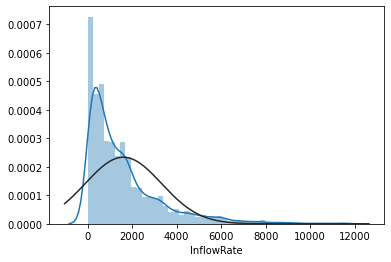

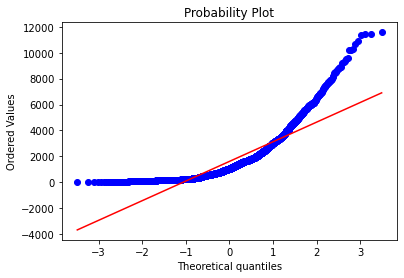

In [36]:
#sns.distplot(df_clean['InflowRate'])
sns.distplot(df_clean['InflowRate'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['InflowRate'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df_clean['InflowRate'].skew())
print("Kurtosis: %f" % df_clean['InflowRate'].kurt())

In [37]:
df_clean['Log_InflowRate']=np.log(df_clean['InflowRate'])

Skewness: -0.489726
Kurtosis: 0.070549


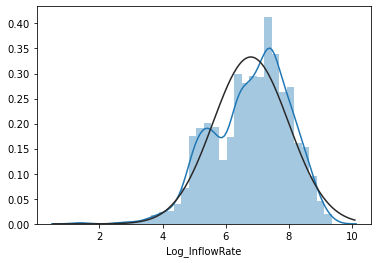

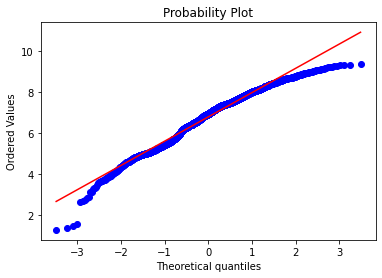

In [38]:
#sns.distplot(df_clean["Log_InflowRate"])

sns.distplot(df_clean["Log_InflowRate"], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean["Log_InflowRate"], plot=plt)
 
#skewness and kurtosis
print("Skewness: %f" % df_clean["Log_InflowRate"].skew())
print("Kurtosis: %f" % df_clean["Log_InflowRate"].kurt())

In [39]:
df_clean

,index,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,...,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE,홍수구간,Log_InflowRate
0,0,1.0,2006,7,10,2006-07-10 08:00:00,8,189.100000,6.4,7,...,7,8,8,2.54,122.61,31.8333,122.601,2.54,0,5.242276
1,1,1.0,2006,7,10,2006-07-10 09:00:00,9,216.951962,6.3,7,...,8,10,10,2.53,122.6,34.1667,122.598,2.53,0,5.379676
2,2,1.0,2006,7,10,2006-07-10 10:00:00,10,251.424419,6.4,7,...,9,10,11,2.53,122.59,38,122.595,2.53,0,5.527142
3,3,1.0,2006,7,10,2006-07-10 11:00:00,11,302.812199,7.3,7,...,10,15,14,2.53,122.585,48,122.593,2.53,0,5.713113
4,4,1.0,2006,7,10,2006-07-10 12:00:00,12,384.783406,8.2,7,...,12,18,16,2.53,122.575,61.6667,122.587,2.53,0,5.952681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,1164,25.0,2017,7,18,2017-07-18 18:00:00,18,513.368437,22.7836,6,...,0,1,1,3.03,137.13,40.3587,137.139,3.03,1,6.240994
2843,1165,25.0,2017,7,18,2017-07-18 19:00:00,19,502.846843,8.2586,2,...,0,1,1,3,137.145,20.2915,137.15,3,1,6.220286
2844,1166,25.0,2017,7,18,2017-07-18 20:00:00,20,491.954805,4.1089,1,...,0,1,1,2.98,137.155,15.0122,137.158,2.98,1,6.198387
2845,1167,25.0,2017,7,18,2017-07-18 21:00:00,21,481.103083,3.3854,1,...,0,1,1,2.96,137.165,13.5958,137.168,2.96,1,6.176082


In [40]:
df_clean = df_clean.drop(['InflowRate'], axis = 1)

In [41]:
df_clean
df_clean = df_clean.drop(['index'], axis = 1)

In [42]:
df_clean.insert(6, 'InflowRate', value = df_clean['Log_InflowRate'])

In [43]:
df_clean
df_clean = df_clean.drop(['Log_InflowRate'], axis = 1)

In [44]:
df_clean
df_clean = df_clean.drop(['홍수구간'], axis = 1)

## Train/Test  set 

In [45]:
train=pd.concat([df_clean,df_test])
train=train.reset_index(drop=False, inplace=False)
train

,index,FloodEventNo,Y,M,D,date,T,InflowRate,BMR1,rainfallA_1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
0,0,1.0,2006,7,10,2006-07-10 08:00:00,8,5.242276,6.4,7,...,6.4,7,7,8,8,2.54,122.61,31.8333,122.601,2.54
1,1,1.0,2006,7,10,2006-07-10 09:00:00,9,5.379676,6.3,7,...,7.3,7,8,10,10,2.53,122.6,34.1667,122.598,2.53
2,2,1.0,2006,7,10,2006-07-10 10:00:00,10,5.527142,6.4,7,...,8.2,7,9,10,11,2.53,122.59,38,122.595,2.53
3,3,1.0,2006,7,10,2006-07-10 11:00:00,11,5.713113,7.3,7,...,11.3,9,10,15,14,2.53,122.585,48,122.593,2.53
4,4,1.0,2006,7,10,2006-07-10 12:00:00,12,5.952681,8.2,7,...,14.4,12,12,18,16,2.53,122.575,61.6667,122.587,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,3047,26.0,2018,7,7,2018-07-07 17:00:00,17,NaN,2.3689,1,...,2.1722,1,0,0,0,3.16,129.95,11.6806,129.964,3.16
3003,3048,26.0,2018,7,7,2018-07-07 18:00:00,18,NaN,2.3689,1,...,2.0805,1,0,0,0,3.15,129.97,11.6042,129.975,3.15
3004,3049,26.0,2018,7,7,2018-07-07 19:00:00,19,NaN,2.3689,1,...,2.0354,1,0,0,0,3.13,129.98,11.5666,129.982,3.13
3005,3050,26.0,2018,7,7,2018-07-07 20:00:00,20,NaN,2.3689,1,...,1.8993,1,0,0,0,3.11,129.99,11.4364,129.989,3.11


In [46]:
train = train.drop(['index'], axis = 1)
train =train.drop(['Y','M','D','T'], axis = 1)
train

,FloodEventNo,date,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,rainfallD_1,WaterLevelE1,WaterLevelD1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
0,1.0,2006-07-10 08:00:00,5.242276,6.4,7,7,7,8,2.54,122.569,...,6.4,7,7,8,8,2.54,122.61,31.8333,122.601,2.54
1,1.0,2006-07-10 09:00:00,5.379676,6.3,7,8,7,8,2.53,122.562,...,7.3,7,8,10,10,2.53,122.6,34.1667,122.598,2.53
2,1.0,2006-07-10 10:00:00,5.527142,6.4,7,9,7,8,2.53,122.556,...,8.2,7,9,10,11,2.53,122.59,38,122.595,2.53
3,1.0,2006-07-10 11:00:00,5.713113,7.3,7,10,7,8,2.53,122.556,...,11.3,9,10,15,14,2.53,122.585,48,122.593,2.53
4,1.0,2006-07-10 12:00:00,5.952681,8.2,7,12,8,10,2.53,122.556,...,14.4,12,12,18,16,2.53,122.575,61.6667,122.587,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,26.0,2018-07-07 17:00:00,NaN,2.3689,1,0,0,0,3.16,129.994,...,2.1722,1,0,0,0,3.16,129.95,11.6806,129.964,3.16
3003,26.0,2018-07-07 18:00:00,NaN,2.3689,1,0,0,0,3.15,130.006,...,2.0805,1,0,0,0,3.15,129.97,11.6042,129.975,3.15
3004,26.0,2018-07-07 19:00:00,NaN,2.3689,1,0,0,0,3.13,130.012,...,2.0354,1,0,0,0,3.13,129.98,11.5666,129.982,3.13
3005,26.0,2018-07-07 20:00:00,NaN,2.3689,1,0,0,0,3.11,130.019,...,1.8993,1,0,0,0,3.11,129.99,11.4364,129.989,3.11


In [47]:
#pd.set_option('display.max_rows',None)

In [48]:
#데이터셋 나눠서 저장
df_train = train.iloc[:2847]
df_test = train.iloc[2847:]
df_train.to_excel('trainset.xlsx',index=False)
df_test.to_excel('testset.xlsx',index=False)

# 모델링

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

import warnings

warnings.filterwarnings(action='ignore')

In [50]:
train = pd.read_excel('trainset.xlsx', header=0)
test = pd.read_excel('testset.xlsx', header=0)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [51]:
train

,FloodEventNo,date,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,rainfallD_1,WaterLevelE1,WaterLevelD1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
0,1,2006-07-10 08:00:00,5.242276,6.4000,7,7,7,8,2.54,122.56875,...,6.4000,7,7,8,8,2.54,122.610,31.833333,122.600903,2.54
1,1,2006-07-10 09:00:00,5.379676,6.3000,7,8,7,8,2.53,122.56250,...,7.3000,7,8,10,10,2.53,122.600,34.166667,122.597782,2.53
2,1,2006-07-10 10:00:00,5.527142,6.4000,7,9,7,8,2.53,122.55625,...,8.2000,7,9,10,11,2.53,122.590,38.000000,122.594661,2.53
3,1,2006-07-10 11:00:00,5.713113,7.3000,7,10,7,8,2.53,122.55625,...,11.3000,9,10,15,14,2.53,122.585,48.000000,122.592748,2.53
4,1,2006-07-10 12:00:00,5.952681,8.2000,7,12,8,10,2.53,122.55625,...,14.4000,12,12,18,16,2.53,122.575,61.666667,122.587423,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,25,2017-07-18 18:00:00,6.240994,22.7836,6,0,1,1,3.03,137.16875,...,1.7366,6,0,1,1,3.03,137.130,40.358667,137.139458,3.03
2843,25,2017-07-18 19:00:00,6.220286,8.2586,2,0,1,1,3.00,137.18125,...,1.7366,2,0,1,1,3.00,137.145,20.291500,137.149685,3.00
2844,25,2017-07-18 20:00:00,6.198387,4.1089,1,0,1,1,2.98,137.18750,...,1.7366,1,0,1,1,2.98,137.155,15.012167,137.158036,2.98
2845,25,2017-07-18 21:00:00,6.176082,3.3854,1,0,1,1,2.96,137.19375,...,1.7366,1,0,1,1,2.96,137.165,13.595833,137.167776,2.96


In [52]:
test

,FloodEventNo,date,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,rainfallD_1,WaterLevelE1,WaterLevelD1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
0,26,2018-07-01 06:00:00,NaN,14.2576,32,0,0,0,1.93,120.49375,...,0.8413,32,0,1,0,1.93,120.515,38.407917,120.500966,1.93
1,26,2018-07-01 07:00:00,NaN,10.9657,20,1,0,0,1.93,120.48750,...,4.7653,21,1,14,8,1.93,120.510,37.138333,120.497829,1.93
2,26,2018-07-01 08:00:00,NaN,7.9442,11,5,0,0,1.92,120.48125,...,12.9398,21,5,19,24,1.92,120.505,52.763083,120.494692,1.92
3,26,2018-07-01 09:00:00,NaN,7.8916,3,11,0,0,1.92,120.47500,...,19.6616,18,11,22,33,1.92,120.500,78.668333,120.491556,1.92
4,26,2018-07-01 10:00:00,NaN,13.3484,4,25,1,8,1.92,120.47500,...,26.6211,20,25,23,36,1.92,120.495,111.776000,120.490849,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,2018-07-07 17:00:00,NaN,2.3689,1,0,0,0,3.16,129.99375,...,2.1722,1,0,0,0,3.16,129.950,11.680583,129.963927,3.16
156,26,2018-07-07 18:00:00,NaN,2.3689,1,0,0,0,3.15,130.00625,...,2.0805,1,0,0,0,3.15,129.970,11.604167,129.975113,3.15
157,26,2018-07-07 19:00:00,NaN,2.3689,1,0,0,0,3.13,130.01250,...,2.0354,1,0,0,0,3.13,129.980,11.566583,129.982202,3.13
158,26,2018-07-07 20:00:00,NaN,2.3689,1,0,0,0,3.11,130.01875,...,1.8993,1,0,0,0,3.11,129.990,11.436417,129.989292,3.11


In [53]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    RMSE = mean_squared_error(y_true, y_pred)**0.5
    return RMSE


def print_score(pred, test):
    print('MSE:',mean_squared_error(pred,test))
    print('MAE:',mean_absolute_error(pred,test))
    print('r2_score:',r2_score(pred,test))
    print('rmse:',rmse(pred,test))

In [54]:
print(train.shape, test.shape)

(2847, 48) (160, 48)


In [55]:
# 스케일링을 하기 위해서는 datatime을 뺴야한다
Ttrain = train.drop('InflowRate',axis=1)
Ttrain = Ttrain.drop('date',axis=1)
Ttarget = train['InflowRate']
Ttest = test.drop('InflowRate',axis=1)
Ttest = Ttest.drop('date',axis=1)

In [56]:
# min - max 스케일링
mm = MinMaxScaler()
mm = mm.fit(Ttrain)
Ttrain = mm.transform(Ttrain)
Ttest = mm.transform(Ttest)

In [57]:
Ttrain

array([[0.        , 0.01948843, 0.02147239, ..., 0.01957409, 0.15504297,
        0.11611374],
       [0.        , 0.01918392, 0.02147239, ..., 0.02101083, 0.15491893,
        0.11532385],
       [0.        , 0.01948843, 0.02147239, ..., 0.0233712 , 0.15479488,
        0.11532385],
       ...,
       [1.        , 0.01251188, 0.00306748, ..., 0.00921648, 0.73362217,
        0.15086888],
       [1.        , 0.01030877, 0.00306748, ..., 0.00834437, 0.73400929,
        0.1492891 ],
       [1.        , 0.0100003 , 0.00306748, ..., 0.00737636, 0.73452614,
        0.14770932]])

In [58]:
Ttest

array([[1.04166667, 0.04341535, 0.09815951, ..., 0.02362238, 0.07158014,
        0.06793049],
       [1.04166667, 0.03339129, 0.06134969, ..., 0.02284063, 0.07145546,
        0.06793049],
       [1.04166667, 0.02419062, 0.03374233, ..., 0.03246155, 0.07133079,
        0.0671406 ],
       ...,
       [1.04166667, 0.00721346, 0.00306748, ..., 0.00709486, 0.44841574,
        0.16271722],
       [1.04166667, 0.00721346, 0.00306748, ..., 0.00701471, 0.44869751,
        0.16113744],
       [1.04166667, 0.00721346, 0.00306748, ..., 0.00696053, 0.44891422,
        0.16034755]])

In [59]:
print(Ttrain.shape, Ttest.shape)

(2847, 46) (160, 46)


In [60]:
folds = 10
KF = KFold(n_splits = folds, shuffle = True, random_state=42)

In [61]:
xgb_avg = 0
lgb_avg = 0
cat_avg = 0

xgb_preds = np.zeros([Ttest.shape[0],])
lgb_preds = np.zeros([Ttest.shape[0],])
cat_preds = np.zeros([Ttest.shape[0],])

## 파라미터 적용결과

In [62]:
cat_params = {
    'max_depth': 6,
    'learning_rate': 0.2398456596579591,
    'n_estimators' : 947,
    'subsample' : 0.7582260920690718,
    'eval_metric' : 'RMSE',
    'loss_function': 'RMSE',
    'random_seed' : 0,
}
    
for i,(train_ind, test_ind) in enumerate(KF.split(Ttrain)):
    print('========Fold',i+1)
    Xtrain, XCV, ytrain, yCV = Ttrain[train_ind], Ttrain[test_ind], Ttarget[train_ind], Ttarget[test_ind]
    
    cat_model = cat.CatBoostRegressor(**cat_params)
    
    cat_model.fit(Xtrain,ytrain,eval_set=[(XCV,yCV)],early_stopping_rounds=30,verbose=False)
    
    pred = cat_model.predict(XCV)
    
    print_score(pred,yCV)
    
    cat_preds += cat_model.predict(Ttest)/folds
    cat_avg += rmse(pred,yCV)/folds

print('\n\nAverage RMSE Score:',cat_avg)

========Fold 1
MSE: 0.00885525041591229
MAE: 0.06048844720278349
r2_score: 0.993746289840607
rmse: 0.0941023401192143
========Fold 2
MSE: 0.012156772417697803
MAE: 0.06512542652566682
r2_score: 0.9906293223860642
rmse: 0.1102577544560826
========Fold 3
MSE: 0.008021699327311045
MAE: 0.05690298438276792
r2_score: 0.9937700272042655
rmse: 0.08956393988269523
========Fold 4
MSE: 0.01823776821269882
MAE: 0.07773904637277451
r2_score: 0.9886723699970739
rmse: 0.1350472813969197
========Fold 5
MSE: 0.009143095933577752
MAE: 0.061517932507078
r2_score: 0.9935964527188302
rmse: 0.09561953740516502
========Fold 6
MSE: 0.013742815226567345
MAE: 0.06078886216142589
r2_score: 0.9907850727620038
rmse: 0.1172297540156395
========Fold 7
MSE: 0.012319718082354334
MAE: 0.06618626475610004
r2_score: 0.9894778007309847
rmse: 0.11099422544598586
========Fold 8
MSE: 0.009023594872605734
MAE: 0.05837205252512821
r2_score: 0.9929609183547053
rmse: 0.09499260430478645
========Fold 9
MSE: 0.01429662546188127
M

In [63]:
xgb_params = {
    'max_depth': 7, 
    'learning_rate': 0.09336069352137363,
    'colsample_bytree': 0.2,
    'min_child_weight' : 3,
    'n_estimators' : 952,
    'gamma' : 0,
    'subsample': 1,
    'nthread' : -1,
    'eval_metric' : 'rmse',
    'objective' : 'reg:squarederror',
    'seed' : 0
}

def xgb_mape(preds, dtrain):
    labels = dtrain.get_label()
    return np.mean(np.abs((labels - preds) / (labels)))*100

for i,(train_ind, test_ind) in enumerate(KF.split(Ttrain)):
    print('========Fold',i+1)
    Xtrain, XCV, ytrain, yCV = Ttrain[train_ind], Ttrain[test_ind], Ttarget[train_ind], Ttarget[test_ind]
    
    xgb_model = xgb.XGBRegressor(**xgb_params)
    
    xgb_model.fit(Xtrain,ytrain,eval_set=[(XCV,yCV)],eval_metric=['rmse','mae'],early_stopping_rounds=30,verbose=False)
    
    pred = xgb_model.predict(XCV)
    
    print_score(pred,yCV)
    
    xgb_preds += xgb_model.predict(Ttest)/folds
    xgb_avg += rmse(pred,yCV)/folds
    

print('\n\nAverage RMSE Score:',xgb_avg)

========Fold 1
MSE: 0.008083968497996594
MAE: 0.050804116206868956
r2_score: 0.9942447363311058
rmse: 0.0899108919875484
========Fold 2
MSE: 0.01175746330414422
MAE: 0.06068701884937432
r2_score: 0.99098284339912
rmse: 0.10843183713349239
========Fold 3
MSE: 0.007269778148621233
MAE: 0.05133320573622447
r2_score: 0.9942558753015636
rmse: 0.08526299401628606
========Fold 4
MSE: 0.015029423472157383
MAE: 0.07128547031127729
r2_score: 0.9907457300491758
rmse: 0.12259454911274556
========Fold 5
MSE: 0.00796502820836327
MAE: 0.05440445047881968
r2_score: 0.9943286249499896
rmse: 0.08924700671934757
========Fold 6
MSE: 0.007880244226778525
MAE: 0.052653300485985044
r2_score: 0.9946875186808974
rmse: 0.0887707396993994
========Fold 7
MSE: 0.01153552231017034
MAE: 0.05835665323862942
r2_score: 0.9902629367658162
rmse: 0.10740354887139596
========Fold 8
MSE: 0.006673317797502465
MAE: 0.05193475791877121
r2_score: 0.994853163974322
rmse: 0.08169037763104334
========Fold 9
MSE: 0.0090444660030321

In [64]:
lgb_params = {
    'n_estimators':779,
    'num_leaves':42,
    'learning_rate':0.23362903469717905,
    'max_depth':4,
    'boosting_type':'gbdt',
    'metric' : 'mse',
    'n_jobs':-1,
    'objective' : 'regression',
    'seed' : 0
}

for i,(train_ind, test_ind) in enumerate(KF.split(Ttrain)):
    print('========Fold',i+1)
    Xtrain, XCV, ytrain, yCV = Ttrain[train_ind], Ttrain[test_ind], Ttarget[train_ind], Ttarget[test_ind]
    
    lgb_model = lgb.LGBMRegressor(**lgb_params)
    
    lgb_model.fit(Xtrain,ytrain,eval_set=[(XCV,yCV)],eval_metric='rmse',early_stopping_rounds=30,verbose=False)
    
    pred = lgb_model.predict(XCV)
    
    print_score(pred,yCV)
    
    lgb_preds += lgb_model.predict(Ttest)/folds
    lgb_avg += rmse(pred,yCV)/folds

print('\n\nAverage RMSE Score:',lgb_avg)

========Fold 1
MSE: 0.01184119351470451
MAE: 0.06751216423819423
r2_score: 0.9916939725825338
rmse: 0.10881724824082123
========Fold 2
MSE: 0.012927626738645172
MAE: 0.07207376489208776
r2_score: 0.9901744134212265
rmse: 0.11369972180548715
========Fold 3
MSE: 0.015067531435993686
MAE: 0.07410720906014574
r2_score: 0.9883444431515108
rmse: 0.12274987346630417
========Fold 4
MSE: 0.020245965191220742
MAE: 0.08459721078000128
r2_score: 0.987761280756419
rmse: 0.14228831712836
========Fold 5
MSE: 0.010305269550196157
MAE: 0.06363041135300156
r2_score: 0.9927886221091579
rmse: 0.1015148735417434
========Fold 6
MSE: 0.019705342730301497
MAE: 0.08288051434536206
r2_score: 0.9870208660058891
rmse: 0.140375719874562
========Fold 7
MSE: 0.015732994814973415
MAE: 0.07477891847842924
r2_score: 0.9865501127860163
rmse: 0.125431235403999
========Fold 8
MSE: 0.00875761414495452
MAE: 0.06263413003014147
r2_score: 0.9932113566683903
rmse: 0.09358212513591749
========Fold 9
MSE: 0.01627163670083314
MAE

In [65]:
total_avg = (xgb_avg + lgb_avg + cat_avg)/3
total_avg

0.10761314327056277

In [66]:
total_preds = (xgb_preds + lgb_preds + cat_preds)/3
total_preds.shape

(160,)

In [67]:
total_preds = list(total_preds)
total_preds

[4.840046469088517,
 4.851375116901926,
 5.135597879570965,
 5.3934204039784746,
 5.628043425902434,
 5.608995233014521,
 5.6612722203765555,
 5.642699221960187,
 5.657075332402822,
 5.775334797501036,
 6.008918930477751,
 6.195787890846977,
 6.297273036894076,
 6.650326370258967,
 6.583113993737978,
 6.601483038088332,
 6.6335007609766095,
 6.652737363767831,
 6.739761556071969,
 6.807896037794072,
 7.020131272173408,
 7.375553734632767,
 7.5656585436282375,
 7.558054812404751,
 7.510403272316147,
 7.561555547636215,
 7.7431581965919465,
 7.85359889504642,
 7.899021452295215,
 7.90286053545717,
 7.9253777014211755,
 7.927841015669457,
 7.99320696109432,
 7.987655762186109,
 7.99088061174853,
 7.98452133739286,
 7.966663417931611,
 7.939325752240403,
 7.884649727245063,
 7.876535226477898,
 7.851264049614623,
 7.841113285709869,
 7.843820531558966,
 7.8241214158475145,
 7.8007221798650335,
 7.760557454020604,
 7.707480949925319,
 7.620456365091847,
 7.5937971673303375,
 7.5558581959854

In [68]:
import math
total_preds = [math.exp(x) for x in total_preds]
total_preds

[126.47522878216463,
 127.91616864566495,
 169.96590864727173,
 219.95443339729493,
 278.11742758868667,
 272.8699295232662,
 287.51419139024733,
 282.2234750895489,
 286.3100551181011,
 322.25230592669067,
 407.04304050492834,
 490.6778933594548,
 543.0889055868339,
 773.0365805176233,
 722.7865813569459,
 736.1861721908424,
 760.1385816823923,
 774.9026152903066,
 845.3591410632728,
 904.9647908401288,
 1118.9334929374807,
 1596.4756096223286,
 1930.7398369040907,
 1916.1146834545689,
 1826.9501526990032,
 1922.8342484810412,
 2305.7428855642856,
 2574.984761062695,
 2694.644199814809,
 2705.009046012796,
 2766.6091103747426,
 2773.4325386895157,
 2960.7768467007745,
 2944.3865205722423,
 2953.89705092735,
 2935.1720110988144,
 2883.221193090211,
 2805.4682897512344,
 2656.194470538203,
 2634.7279911395085,
 2568.9795829658083,
 2543.034382324176,
 2549.9283291937754,
 2500.1885195856257,
 2442.365167824899,
 2346.2121461891456,
 2224.930481684122,
 2039.49267073184,
 1985.8397813953

In [69]:
submission = pd.read_excel('testset.xlsx', header=0)
submission

,FloodEventNo,date,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,rainfallD_1,WaterLevelE1,WaterLevelD1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
0,26,2018-07-01 06:00:00,NaN,14.2576,32,0,0,0,1.93,120.49375,...,0.8413,32,0,1,0,1.93,120.515,38.407917,120.500966,1.93
1,26,2018-07-01 07:00:00,NaN,10.9657,20,1,0,0,1.93,120.48750,...,4.7653,21,1,14,8,1.93,120.510,37.138333,120.497829,1.93
2,26,2018-07-01 08:00:00,NaN,7.9442,11,5,0,0,1.92,120.48125,...,12.9398,21,5,19,24,1.92,120.505,52.763083,120.494692,1.92
3,26,2018-07-01 09:00:00,NaN,7.8916,3,11,0,0,1.92,120.47500,...,19.6616,18,11,22,33,1.92,120.500,78.668333,120.491556,1.92
4,26,2018-07-01 10:00:00,NaN,13.3484,4,25,1,8,1.92,120.47500,...,26.6211,20,25,23,36,1.92,120.495,111.776000,120.490849,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,2018-07-07 17:00:00,NaN,2.3689,1,0,0,0,3.16,129.99375,...,2.1722,1,0,0,0,3.16,129.950,11.680583,129.963927,3.16
156,26,2018-07-07 18:00:00,NaN,2.3689,1,0,0,0,3.15,130.00625,...,2.0805,1,0,0,0,3.15,129.970,11.604167,129.975113,3.15
157,26,2018-07-07 19:00:00,NaN,2.3689,1,0,0,0,3.13,130.01250,...,2.0354,1,0,0,0,3.13,129.980,11.566583,129.982202,3.13
158,26,2018-07-07 20:00:00,NaN,2.3689,1,0,0,0,3.11,130.01875,...,1.8993,1,0,0,0,3.11,129.990,11.436417,129.989292,3.11


In [70]:
count = 0
for idx in range(len(submission)):
    submission.loc[idx,'InflowRate'] = total_preds[count]
    count+=1
    if count==160:
        break

In [71]:
submission

,FloodEventNo,date,InflowRate,BMR1,rainfallA_1,rainfallB_1,rainfallC_1,rainfallD_1,WaterLevelE1,WaterLevelD1,...,BMR6,rainfallA_6,rainfallB_6,rainfallC_6,rainfallD_6,WaterLevelE6,WaterLevelD6,total_rainfall,WaterLevelD,WaterLevelE
0,26,2018-07-01 06:00:00,126.475229,14.2576,32,0,0,0,1.93,120.49375,...,0.8413,32,0,1,0,1.93,120.515,38.407917,120.500966,1.93
1,26,2018-07-01 07:00:00,127.916169,10.9657,20,1,0,0,1.93,120.48750,...,4.7653,21,1,14,8,1.93,120.510,37.138333,120.497829,1.93
2,26,2018-07-01 08:00:00,169.965909,7.9442,11,5,0,0,1.92,120.48125,...,12.9398,21,5,19,24,1.92,120.505,52.763083,120.494692,1.92
3,26,2018-07-01 09:00:00,219.954433,7.8916,3,11,0,0,1.92,120.47500,...,19.6616,18,11,22,33,1.92,120.500,78.668333,120.491556,1.92
4,26,2018-07-01 10:00:00,278.117428,13.3484,4,25,1,8,1.92,120.47500,...,26.6211,20,25,23,36,1.92,120.495,111.776000,120.490849,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,2018-07-07 17:00:00,408.764710,2.3689,1,0,0,0,3.16,129.99375,...,2.1722,1,0,0,0,3.16,129.950,11.680583,129.963927,3.16
156,26,2018-07-07 18:00:00,400.165520,2.3689,1,0,0,0,3.15,130.00625,...,2.0805,1,0,0,0,3.15,129.970,11.604167,129.975113,3.15
157,26,2018-07-07 19:00:00,389.196003,2.3689,1,0,0,0,3.13,130.01250,...,2.0354,1,0,0,0,3.13,129.980,11.566583,129.982202,3.13
158,26,2018-07-07 20:00:00,382.077560,2.3689,1,0,0,0,3.11,130.01875,...,1.8993,1,0,0,0,3.11,129.990,11.436417,129.989292,3.11


In [72]:
submission.to_excel('final_submission.xlsx',index=False)